#### 고유값 고유벡터

Ax = ʎx 를 만족하는 scalar ʎ와 그 때의 기저 x를 
각각 고유값, 고유벡터이라 한다.

np.linalg.eig() 함수로 값과 벡터를 출력

In [1]:
import numpy as np

In [2]:
a = np.array([[2,3],[3,-6]])
w1, v1 = np.linalg.eig(a)
print('Eigen Value, w1 : ', w1)
print('Eigen Vector v1 : \n', v1)

Eigen Value, w1 :  [ 3. -7.]
Eigen Vector v1 : 
 [[ 0.9486833  -0.31622777]
 [ 0.31622777  0.9486833 ]]


In [3]:
b = np.array([[5,2,0],[2,5,0],[-3,4,6]])
w2, v2 = np.linalg.eig(b)
print('Eigen Value, w1 : ', w2)
print('Eigen Vector v1 : \n', v2)
#고유 벡터는 각 열에 해당함.

Eigen Value, w1 :  [6. 7. 3.]
Eigen Vector v1 : 
 [[ 0.          0.57735027  0.36650833]
 [ 0.          0.57735027 -0.36650833]
 [ 1.          0.57735027  0.85518611]]


#### iris data 주성분 분석해보기
주성분을 2개의 데이터로 차원축소하여 결과 출력

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns = ['sepal length','sepal width', 'petal length','petal width','target']
df = pd.read_csv(url, names = columns )
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
# 데이터 속성값과 타깃 분리

x = df.iloc[:,0:4].values
y = df.loc[:,['target']].values

stds = StandardScaler()
x = stds.fit_transform(x) # 평균 0과 분산 1인 데이터변환

pca = PCA(n_components=2) 
principal_components = pca.fit_transform(x)

print('\n First', pca.components_[0]) #첫 번째 주성분
print('\n Second', pca.components_[1]) #두 번째 주성분


 First [ 0.52237162 -0.26335492  0.58125401  0.56561105]

 Second [0.37231836 0.92555649 0.02109478 0.06541577]


In [22]:
df_principal = pd.DataFrame(data = principal_components, 
                            columns = ['component 1', 'component 2'])
df_prin_final = pd.concat([df_principal, df['target']], axis=1) #주성분 분석과 원래 data target 합치기

In [23]:
df_prin_final.head(5)

,component 1,component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


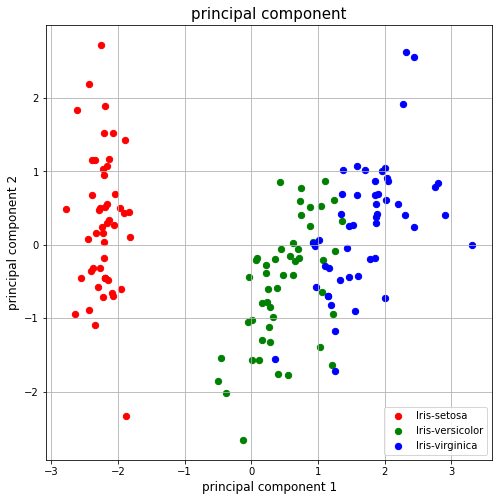

In [55]:
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1', fontsize=12)
ax.set_ylabel('principal component 2', fontsize=12)
ax.set_title('principal component', fontsize=15)

targets=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r','g','b']
for target, color in zip(targets, colors):  
    ax.scatter(df_prin_final.loc[df_prin_final.target==target, 'component 1'],
               df_prin_final.loc[df_prin_final.target==target, 'component 2']
               ,s = 40, c = color)
ax.legend(targets)
ax.grid()
fig.show()